In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv


In [40]:
age_data=pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")
age_data.head()
age_data.set_index("Sno")


,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


In [41]:
age_data.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


Text(0.5, 1.0, 'Cases by age-group')

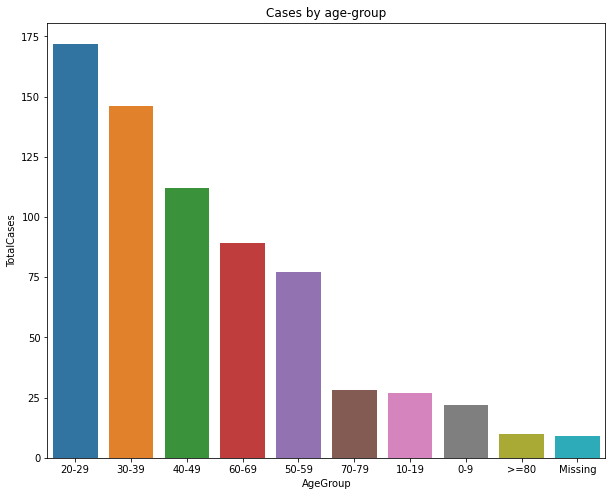

In [103]:
plt.figure(figsize=(10,8))
age_data=age_data.sort_values(by="TotalCases",ascending=False)
sns.barplot(x=age_data.AgeGroup,y=age_data.TotalCases)
plt.title("Cases by age-group")

# COVID- 19 india data Analysis

In [43]:
covid_data=pd.read_csv("../input/covid19-in-india/covid_19_india.csv",parse_dates=["Date"])

In [44]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


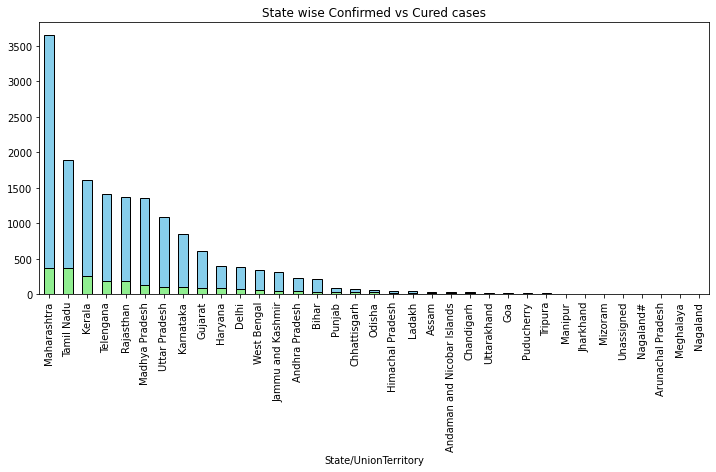

In [45]:
plt.figure(figsize=(12,5))
plt.title("State wise Confirmed vs Cured cases")
covid_data.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False).plot.bar(color="skyblue",edgecolor="black")
covid_data.groupby('State/UnionTerritory')['Cured'].max().sort_values(ascending=False).plot.bar(color="lightgreen",edgecolor="black")



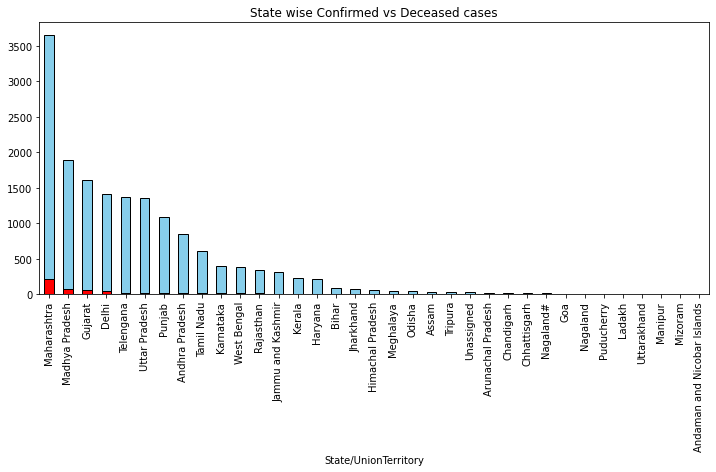

In [101]:
plt.figure(figsize=(12,5))
plt.title("State wise Confirmed vs Deceased cases")
covid_data.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False).plot.bar(color="skyblue",edgecolor="black")
covid_data.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending=False).plot.bar(color="red",edgecolor="black")



In [48]:
#covid_data['cure rate']
confirmedCases=covid_data.groupby('State/UnionTerritory')['Confirmed'].max()
curedCases=covid_data.groupby('State/UnionTerritory')['Cured'].max()
CureRateData=pd.concat([confirmedCases,curedCases],axis=1)
CureRateData['Cure_Rate']=(CureRateData['Cured']/CureRateData['Confirmed'])*100
CureRateData['Cure_Rate']=CureRateData['Cure_Rate'].fillna(0)
CureRateDataGraph=CureRateData.drop(["Confirmed","Cured"],axis=1)


Text(0.5, 1.0, 'Performance of all states ')

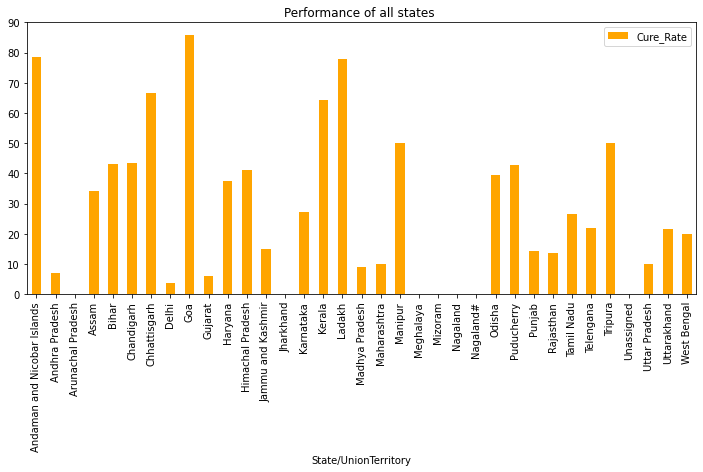

In [49]:
CureRateDataGraph.plot.bar(color="orange",figsize=(12,5))
plt.title("Performance of all states ")
#CureRateDataGraph

# Hospitals in india

In [50]:
hospital_data= pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")
hospital_data.shape

(37, 12)

In [67]:
statewiseTesting_data= pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv",parse_dates=["Date"])
statewiseTesting_data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3


Text(0.5, 1.0, 'Total Samples v/s positive Cases')

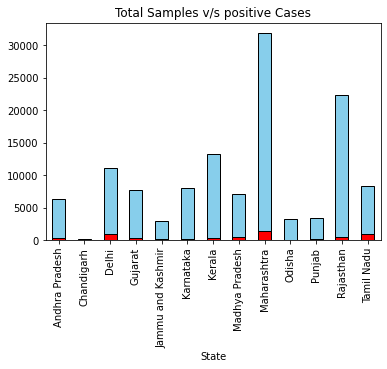

In [100]:
statewiseTesting_data.groupby('State')["TotalSamples"].max().plot.bar(color="skyblue",edgecolor="black")
statewiseTesting_data.groupby('State')["Positive"].max().plot.bar(color="red",edgecolor="black")
plt.title("Total Samples v/s positive Cases")

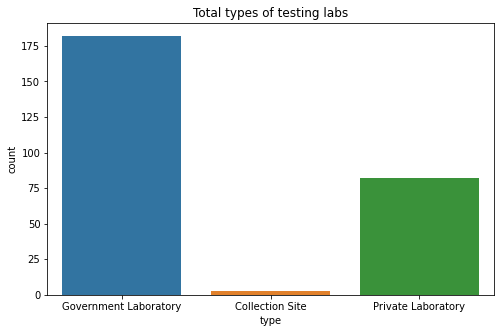

In [99]:
ICMRTestingLabs_data= pd.read_csv("../input/covid19-in-india/ICMRTestingLabs.csv")
plt.figure(figsize=(8,5))
sns.countplot(x='type',  data=ICMRTestingLabs_data)
plt.title("Total types of testing labs")
plt.show()
